In [1]:
from scipy.integrate import odeint, quad, dblquad, tplquad, nquad
from scipy.special import gamma, airy
from sympy import *
import sympy
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 

In [5]:
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
%matplotlib inline

$e^{i\theta}=\cos\theta+i\sin\theta$

$\cos z=\frac{e^{iz}+e^{-iz}}{2}$, $(\cos\theta+i\sin\theta)^{n}=\cos n\theta+i\sin n\theta$

## 绘制洛伦兹吸引子

$\begin{cases}\frac{\text{d}x}{\text{d}t}=-\sigma x+\sigma y\\\frac{\text{d}y}{\text{d}t}=rx-y-xz\\\frac{\text{d}z}{\text{d}t}=-bz+xy\end{cases}$

#### 洛伦兹借助于这个模型，将大气流体运动的强度 x 与水平和垂直方向的温度变化 y 和 z 联系了起来。参数σ称为普兰特数，r 是规范化的瑞利数，b 和几何形状相关。洛伦兹方程是非线性方程组，无法求出解析解，必须使用数值方法求解上述微分方程组。洛伦兹用数值解绘制结果图，并发现了混沌现象。

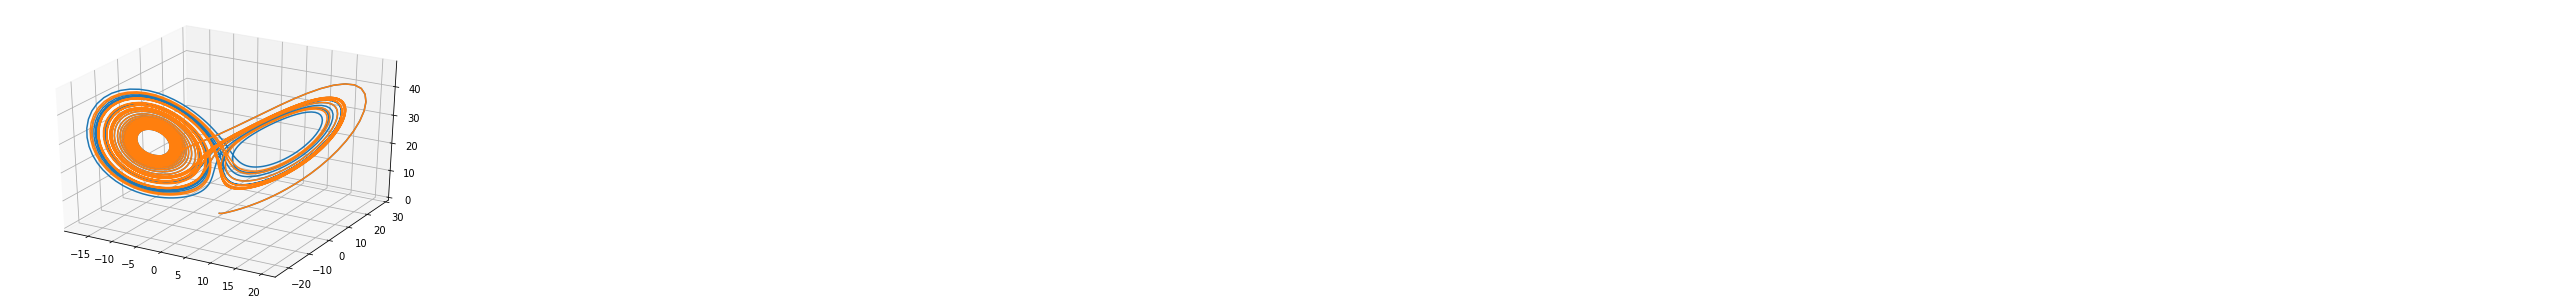

CPU times: user 290 ms, sys: 4.61 ms, total: 295 ms
Wall time: 226 ms


In [13]:
%%time
def lorenz(w, t, sigma, r, b):
    x, y, z = w
    return np.array([sigma * (y - x), x * (r - z) - y, x * y - b * z])    # 直接与lorenz的计算公式对应 

t = np.arange(0, 30, 0.01)
# 调用ode对lorenz进行求解, 用两个不同的初始值 
track1 = odeint(lorenz, (0.0, 1.00, 0.0), t, args = (10.0, 28.0, 3.0))
track2 = odeint(lorenz, (0.0, 1.01, 0.0), t, args = (10.0, 28.0, 3.0))

'''绘图'''
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(track1[:, 0], track1[:, 1], track1[:, 2])
ax.plot(track2[:, 0], track2[:, 1], track2[:, 2])
plt.show()

## 解常微分方程

\begin{cases}\frac{\text{d}^{2}x}{\text{d}t^{2}}=\omega\frac{\text{d}y}{\text{d}t}\\\frac{\text{d}^{2}y}{\text{d}t^{2}}=-\omega\frac{\text{d}x}{\text{d}t}\end{cases}

In [21]:
%%time
def sol(y, t, v0, w0):
    return (w0 * y[1] + v0, -w0 * y[0])
y = odeint(sol, (0, 0), t,args = (10, 10))

Wall time: 20 ms


#### y'' + ay' + by = 0

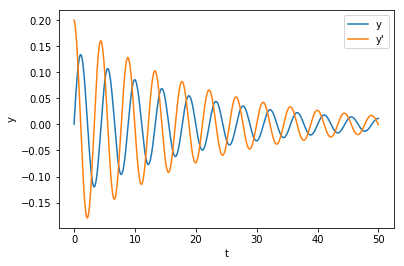

Wall time: 157 ms


In [20]:
%%time
def sol(y, t):
    a = -2.0
    b = -0.1
    return np.array([y[1], a * y[0] + b * y[1]])
time = np.linspace(0.0,50.0,1000)  
yinit = np.array([0.0005,0.2])     # 初值  
y = odeint(sol,yinit,time)  
  
plt.figure()  
plt.plot(time,y[:,0],label='y')    #y[:,0]即返回值的第一列，是y的值。label是为了显示legend用的。  
plt.plot(time,y[:,1],label="y'")     #y[:,1]即返回值的第二列，是y’的值  
plt.xlabel('t')  
plt.ylabel('y')  
plt.legend()  
plt.show()  

## 积分

$\int_{0}^{2\pi}y^{2}sin^{2}(x)(-y\cdot sinx){d}x$

In [6]:
integrate(y ** 2 * sin(x) ** 2 * (- y * sin(x)), (x, 0, pi))

$\int_{0}^{2\pi}{d}x\int_{0}^{1}y^{2}\sqrt{1+4y^{2}}\cdot y{d}y$

In [28]:
integrate(y ** 3 * sqrt(1 + 4 * y ** 2), (x, 0, 2 * pi), (y, 0, 1))

$4\int_{0}^\frac{\pi}{2}{d}x\int_{0}^{2zcosx}\sqrt{4z^{2}-y^{2}}\cdot y{d}y$

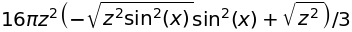

In [34]:
simplify(integrate(4* y * sqrt(4 * z ** 2 - y ** 2), (x, 0, pi / 2), (y, 0, 2 * z * cos(x))))

$\int_{0}^{1}(ax^{2}+b){d}x$

In [11]:
def integrand(x, a, b):
    return a * x ** 2 + b
a = 2
b = 1
I = quad(integrand, 0, 1, args = (a, b))
I

In [13]:
integrate(a * x ** 2 + 1, (x, 0, 1))

In [15]:
area = dblquad(lambda x, y: x * y, 0, 0.5, lambda x: 0, lambda x: 1 - 2 * x)
area

In [25]:
def f(x, y):
    return x * y
def bounds_y():
    return [0, 0.5]
def bounds_x(y):
    return [0, 1 - 2 * y]

nquad(f, [bounds_x, bounds_y])